In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

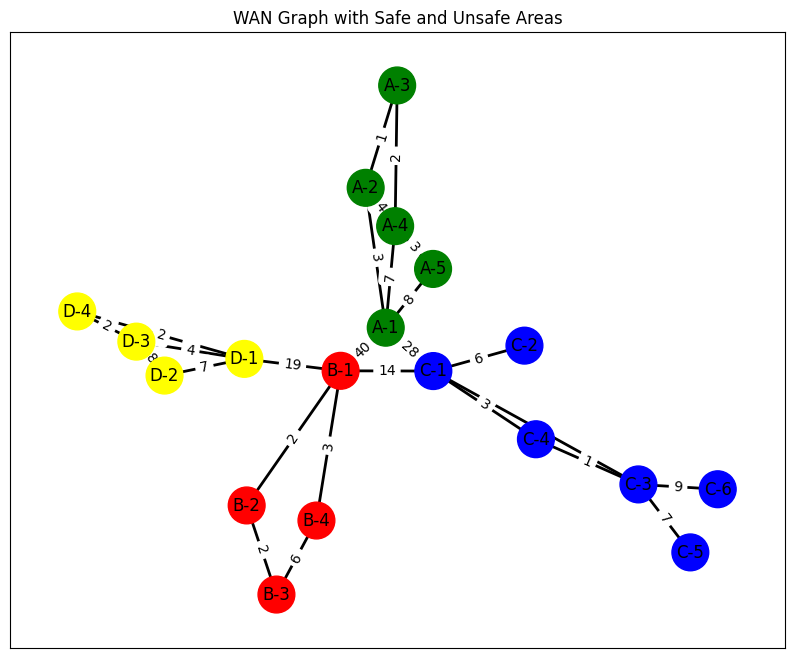

AttributeError: module 'matplotlib.pyplot' has no attribute 'saveFig'

In [20]:
G = nx.Graph()
# Adding nodes for Area A (Safe Area)
G.add_node('A-1', label='Gateway', area='A-Safe')
G.add_node('A-2', label='Node', area='A-Safe')
G.add_node('A-3', label='Node', area='A-Safe')
G.add_node('A-4', label='Node', area='A-Safe')
G.add_node('A-5', label='Node', area='A-Safe')

# Adding nodes for Area B (Unsafe Area)
G.add_node('B-1', label='Gateway', area='B-Unsafe')
G.add_node('B-2', label='Node', area='B-Unsafe')
G.add_node('B-3', label='Node', area='B-Unsafe')
G.add_node('B-4', label='Node', area='B-Unsafe')
# Adding nodes for Area C (Safe Area)
G.add_node('C-1', label='Gateway', area='C-Safe')
G.add_node('C-2', label='Node', area='C-Safe')
G.add_node('C-3', label='Node', area='C-Safe')
G.add_node('C-4', label='Node', area='C-Safe')
G.add_node('C-5', label='Node', area='C-Safe')
G.add_node('C-6', label='Node', area='C-Safe')
# Adding nodes for Area D (Unsafe Area)
G.add_node('D-1', label='Gateway', area='D-Unsafe')
G.add_node('D-2', label='Node', area='D-Unsafe')
G.add_node('D-3', label='Node', area='D-Unsafe')
G.add_node('D-4', label='Node', area='D-Unsafe')

# Adding edges for Area 1 (Safe Area)
G.add_edges_from([('A-1', 'A-2',{'weight':3}), ('A-2', 'A-3',{'weight': 1})
                 , ('A-3', 'A-4',{'weight': 2}), ('A-4', 'A-5',{'weight': 3})
                 , ('A-5', 'A-1',{'weight': 8}), ('A-1', 'A-4',{'weight': 7})
                 , ('A-2', 'A-4',{'weight': 4}), ('A-1', 'B-1',{'weight': 40})
                 , ('A-1', 'C-1',{'weight': 28})
                 ])

G.add_edges_from([('B-1', 'B-2',{'weight':2}), ('B-2', 'B-3',{'weight': 2})
                 , ('B-3', 'B-4',{'weight': 6}), ('B-4', 'B-1',{'weight': 3})
                 , ('B-1', 'C-1',{'weight': 14}), ('B-1', 'D-1',{'weight': 19})
                 ])

G.add_edges_from([('C-1', 'C-2',{'weight':6}), ('C-1', 'C-3',{'weight': 2})
                 , ('C-1', 'C-4',{'weight': 3}), ('C-3', 'C-4',{'weight': 1})
                 , ('C-3', 'C-5',{'weight': 7}), ('C-3', 'C-6',{'weight': 9})])

G.add_edges_from([('D-1', 'D-2',{'weight':7}), ('D-1', 'D-3',{'weight': 4})
                 , ('D-1', 'D-4',{'weight': 2}), ('D-2', 'D-3',{'weight': 8})
                 , ('D-3', 'D-4',{'weight': 2})])

# Draw the graph
areas = [{'name':"A",'area':"Safe"},{'name':"B",'area':"Unsafe"},{'name': "C",'area':"Safe"},{'name':"D",'area':"Unsafe"}]
plot_Graph(G,'WAN Graph with Safe and Unsafe Areas')


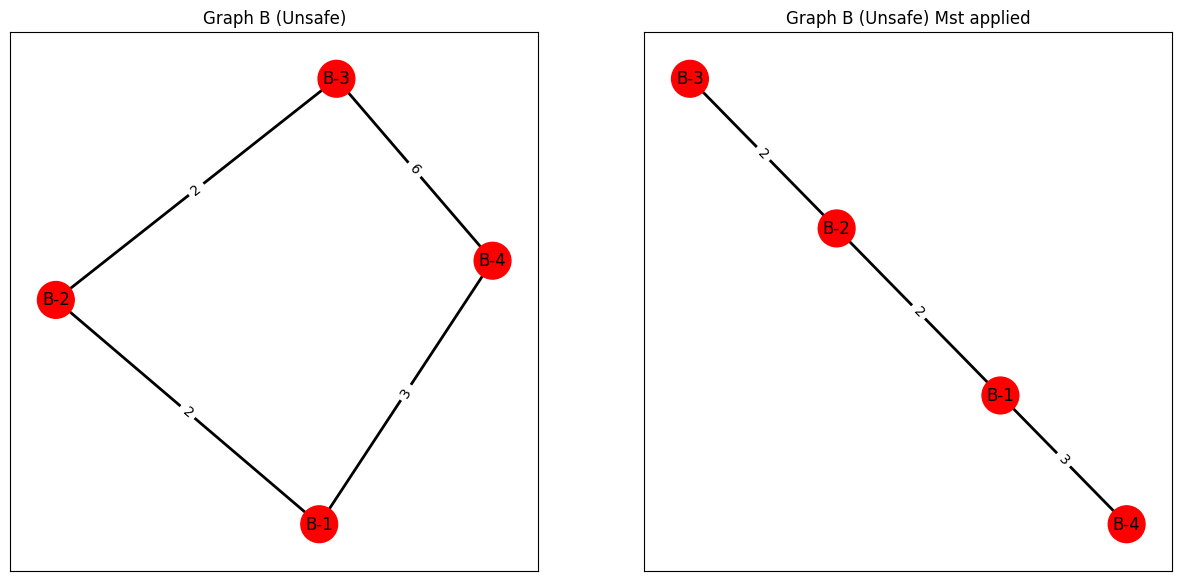

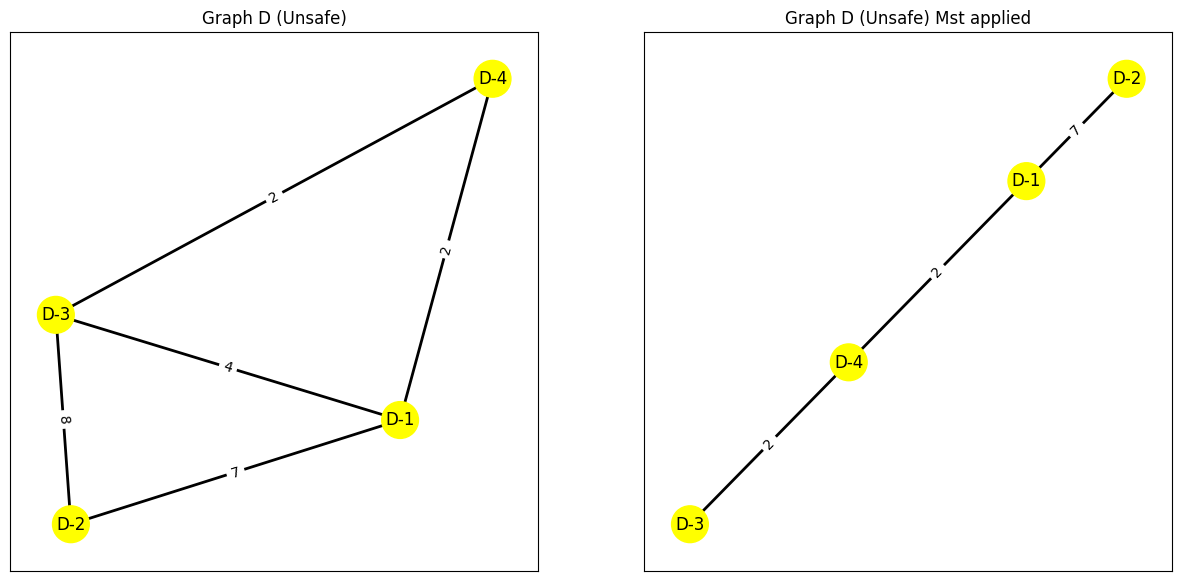

In [21]:
from collections import defaultdict
my_dict = defaultdict(lambda: defaultdict(list))

for i in range(0,len(areas)):
    if areas[i]['area'] == "Unsafe":
        unsafe_nodes = [node for node, attr in G.nodes(data=True) if areas[i]['name'] in attr['area']]        
        unsafe_subgraph = G.subgraph(unsafe_nodes)
        
        #this is for plotting INJA DFS ZADIM VA MST
        mst_unsafe_2 = nx.minimum_spanning_tree(unsafe_subgraph, algorithm='prim', weight='weight')
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        #print(calculate_paths(mst_unsafe_2,areas[i]['name']+'-1'))
        plot_Graph2(unsafe_subgraph, 'Graph '+areas[i]['name'] +' (Unsafe)', axs[0])
        plot_Graph2(mst_unsafe_2,'Graph '+ areas[i]['name']+' (Unsafe) Mst applied', axs[1])
        my_dict[areas[i]['name']] = calculate_paths(mst_unsafe_2,areas[i]['name']+'-1')
    else:
        #compting diskstra 
        
        safe_nodes = [node for node, attr in G.nodes(data=True) if areas[i]['name'] in attr['area']]        
        safe_subgraph = G.subgraph(safe_nodes)
        gateway_node = areas[i]['name'] + '-1'
        for node in safe_nodes:
            length = nx.shortest_path_length(safe_subgraph, source=node, target=gateway_node, weight='weight')
            path = nx.shortest_path(safe_subgraph, source=node, target=gateway_node, weight='weight')
            #print({node:{'length': length,'path': path}})
            my_dict[areas[i]['name']][node]=({'length': length,'path': path}) 



In [22]:
def plot_Graph(G,title):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=5)  # positions for all nodes
    
    # Draw nodes with different colors for safe and unsafe areas
    color_map =[]
    for node, data in G.nodes(data=True):
        if 'A-' in data['area']:
            color_map.append('green')
        elif 'B-' in data['area']:
            color_map.append('red')
        elif 'C-' in data['area']:
            color_map.append('blue')
        elif 'D-' in data['area']:
            color_map.append('yellow')
        elif 'E-' in data['area']:
            color_map.append('brown')
        elif 'F-' in data['area']:
            color_map.append('pink')
    
    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=700)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2)
    
    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    
    # Show the plot
    plt.title(title)
    plt.show()
    plt.savefig('images/'+title+".png");

def plot_Graph2(G, title, ax):
    pos = nx.spring_layout(G, seed=5)  # positions for all nodes
    
    # Draw nodes with different colors for safe and unsafe areas
    color_map = []
    for node, data in G.nodes(data=True):
        if 'A-' in data['area']:
            color_map.append('green')
        elif 'B-' in data['area']:
            color_map.append('red')
        elif 'C-' in data['area']:
            color_map.append('blue')
        elif 'D-' in data['area']:
            color_map.append('yellow')
        elif 'E-' in data['area']:
            color_map.append('brown')
        elif 'F-' in data['area']:
            color_map.append('pink')
    
    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=700, ax=ax)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, ax=ax)
    
    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', ax=ax)
    
    # Set title
    ax.set_title(title)


In [10]:
def calculate_paths(G, root):
    result = {}

    def traverse(node, current_path, current_weight, visited):
        if node in visited:
            return
        # Mark the current node as visited
        visited.add(node)
        # Update the current path and weight
        new_path = current_path + [node]
        # Save the current path and weight for the current node
        result[node] = {
            "path": new_path,
            "length": current_weight
        }
        # Traverse the neighbors
        for neighbor in G.neighbors(node):
            edge_weight = G[node][neighbor]['weight']
            traverse(neighbor, new_path, current_weight + edge_weight, visited)
        # Unmark the current node as visited for other paths
        visited.remove(node)

    traverse(root, [], 0, set())
    return result

In [11]:
#this algorithem used for dataframe as input
def floyd_warshall(df):
    dist = df.copy()

    n = len(df)
    pi = pd.DataFrame(np.full((n, n), None), index=df.index, columns=df.columns)
    np.fill_diagonal(pi.values, np.inf)
    #If there is a direct path between i and j, set pi[i][j] = j
    for i in range(n):
        for j in range(n):
            if i != j and df.iloc[i, j] != np.inf:
                pi.iloc[i, j] = df.index[i] 
                
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist.iloc[i, j] = min(dist.iloc[i, j], dist.iloc[i, k] + dist.iloc[k, j])
    
    return dist,pi
    
def reconstruct_path(pi, start, end):
    if pi.loc[start, end] is None:
        return []  # No path exists
    path = [start]
    while start != end:
        start = pi.loc[start, end]
        path.append(start)
    return path    

In [12]:
allnodes = G.nodes()
gateway_nodes = [node for node, data in G.nodes(data=True) if data.get('label') == 'Gateway']
G_gateway = G.subgraph(gateway_nodes) 

df = nx.to_pandas_adjacency(G_gateway, weight='weight')
df = df.replace(0, np.inf)
np.fill_diagonal(df.values, 0)
#this is the adj matrix just between gateways
print("\nAdj matrix Between Gate :")
print(df)
shortest_lengths_between_gates,shortest_paths_between_gates = floyd_warshall(df)
print("\nShortest Paths Between Gates Matrix :")
print(shortest_lengths_between_gates)
print("\n Pi matrix")
print(shortest_paths_between_gates)
print(reconstruct_path(shortest_paths_between_gates,'D-1','C-1'))


Adj matrix Between Gate :
      D-1   A-1   C-1   B-1
D-1   0.0   inf   inf  19.0
A-1   inf   0.0  28.0  40.0
C-1   inf  28.0   0.0  14.0
B-1  19.0  40.0  14.0   0.0

Shortest Paths Between Gates Matrix :
      D-1   A-1   C-1   B-1
D-1   0.0  59.0  33.0  19.0
A-1  59.0   0.0  28.0  40.0
C-1  33.0  28.0   0.0  14.0
B-1  19.0  40.0  14.0   0.0

 Pi matrix
      D-1   A-1   C-1  B-1
D-1   inf  None  None  D-1
A-1  None   inf   A-1  A-1
C-1  None   C-1   inf  C-1
B-1   B-1   B-1   B-1  inf
[]


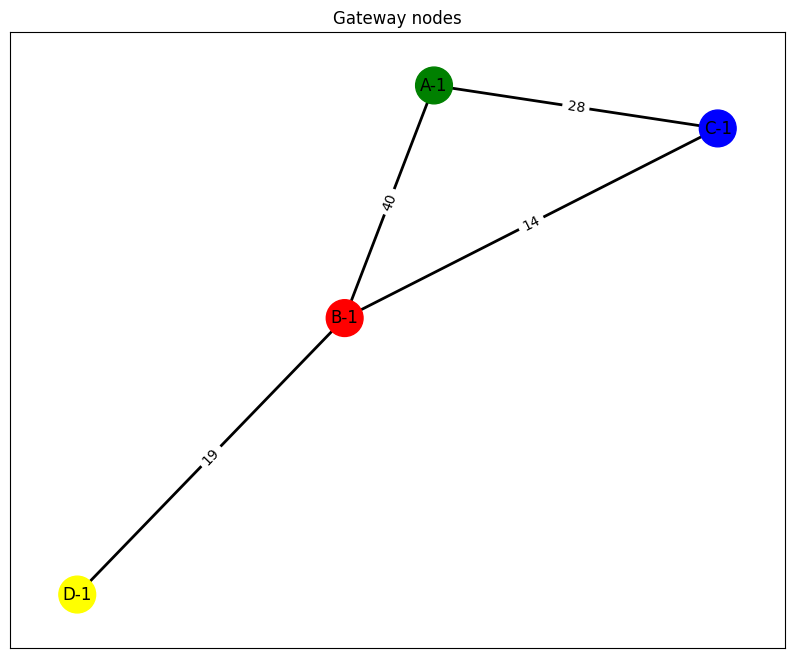

In [13]:
plot_Graph(G_gateway,"Gateway nodes")

In [7]:
def findMinPathLength(first,second):
    if first[0:1]==second[0:1]:
        area = first[0:1]
        gateWayNOde = area+"-1"
        print("it is in same area")
        the_length = my_dict[area][first]['length']+my_dict[area][second]['length']
        the_path = []
        the_path.append(my_dict[area][first]['path'])
        the_path.append(my_dict[area][second]['path'])
        print(the_length)
        print(the_path)
        print('\n')
    else :
        #finding min path beetween first node and its gateway node
        print("it is not in same area")
        firstArea = first[0:1]
        secondArea = second[0:1]
        firstAreagateWayNOde = firstArea+"-1"
        secondAreagateWayNOde = secondArea+"-1"
        the_path = []
        the_length = my_dict[firstArea][first]['length']
        the_path.append(my_dict[firstArea][first]['path'])
        #finding min path beetween first gateway node and second gateway node
        the_length +=shortest_paths_between_gates.loc[firstAreagateWayNOde,secondAreagateWayNOde]
        #finding min path beetween second node and its gateway node
        the_length += my_dict[secondArea][second]['length']
        the_path.append(my_dict[secondArea][second]['path'])
        print(the_length)
        print(the_path)
        print('\n')



In [249]:
findMinPathLength("D-2","D-3")
findMinPathLength("A-2","B-3")
findMinPathLength("B-2","C-3")

it is in same area
11
[['D-1', 'D-2'], ['D-1', 'D-4', 'D-3']]


it is not in same area
47.0
[['A-2', 'A-1'], ['B-1', 'B-2', 'B-3']]


it is not in same area
18.0
[['B-1', 'B-2'], ['C-3', 'C-1']]


